In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

In [2]:
# Set random seed for reproducibility 
np.random.seed(1) 
# Create two classes of data with different means and covariance matrices 
classl_mean = [1, 1] 
classl_cov = [[2, 1], [1, 2]] 
classl_data = np.random.multivariate_normal(classl_mean,classl_cov, size=50) 
class2_mean = [-1, -1] 
class2_cov = [[1, 0], [0, 1]]
class2_data = np.random.multivariate_normal(class2_mean,class2_cov, size=50) 
# Combine the two classes into one data set 
data = np.vstack((classl_data, class2_data))

In [3]:
data = np.vstack((classl_data, class2_data))

In [4]:
data.shape

(100, 2)

In [5]:
# Standardize the data 
data_mean = np.mean(data, axis=0) 
data_std = np.std(data, axis=0) 
data_std[data_std == 0] = 1 # avoid division by zero 
data_scaled = (data - data_mean) / data_std

In [6]:
data_scaled 

array([[-5.11511206e-01, -9.04400450e-01],
       [ 1.87045141e+00,  6.70290091e-01],
       [ 1.19660784e+00, -1.08527395e+00],
       [-5.45171789e-01, -1.07700340e+00],
       [ 5.67879315e-01,  3.59977826e-01],
       [ 4.71745855e-01, -1.46706699e+00],
       [ 1.27614262e+00,  8.30569756e-01],
       [ 2.49126735e-01, -7.30128296e-01],
       [ 1.40919398e+00,  4.67345223e-01],
       [ 3.67343250e-01,  9.92186125e-01],
       [ 1.17329464e+00,  2.21709437e+00],
       [-4.33279340e-01,  2.36036702e-01],
       [ 2.41880235e-01, -3.35097791e-01],
       [ 1.39333617e+00,  3.98076760e-01],
       [ 7.02548988e-01,  1.22578399e+00],
       [ 1.64698323e+00,  1.13270526e+00],
       [ 1.89753451e+00,  9.12808800e-01],
       [ 1.40850271e+00,  1.30078971e+00],
       [ 1.70729443e+00,  1.79226883e+00],
       [-1.31614205e+00, -2.81481839e-01],
       [ 1.43386089e+00,  4.78837787e-01],
       [ 5.13799836e-01,  2.18601499e+00],
       [ 1.05241321e+00,  3.97074249e-01],
       [-6.

In [7]:
# Compute the covariance matrix of the standardize data 
covariance = np.cov(data_scaled.T)

In [8]:
covariance 

array([[1.01010101, 0.52264027],
       [0.52264027, 1.01010101]])

In [9]:
# Compute the eigenvalues and eigenvectors of the covariance matrix 
eigenvalues, eigenvectors = np.linalg.eig(covariance) 
# Sort the eigenvalues in decreasing order and eigenvectors accordingly 
idx = eigenvalues.argsort()[::-1] 
eigenvalues = eigenvalues[idx] 
eigenvectors = eigenvectors[:, idx]

In [10]:
idx

array([0, 1], dtype=int64)

In [11]:
eigenvalues

array([1.53274128, 0.48746074])

In [12]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

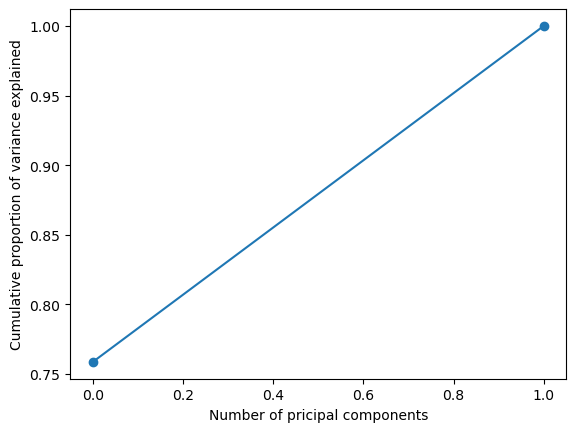

In [13]:
 #Calculate the proportion of variance explained by each principal component 
prop_var = eigenvalues / np.sum(eigenvalues) 
# Calculate the cumulative proportion of variance explained 
cum_var = np.cumsum(prop_var) 
# Plot the cumulative proportion of variance explained 
plt.plot(cum_var, "-o") 
plt.xlabel( 'Number of pricipal components') 
plt.ylabel('Cumulative proportion of variance explained') 
plt.show() 
# Choose the number of pricipal components to retain based on the plot 
n_components = 1

In [14]:
prop_var

array([0.75870693, 0.24129307])

In [15]:
cum_var

array([0.75870693, 1.        ])

In [16]:
 #Project the standardized data onto the chosen principal components 
pca = PCA(n_components=n_components) 
data_pca = pca.fit_transform(data_scaled)

In [17]:
data_pca

array([[-1.00120073],
       [ 1.79657554],
       [ 0.07872495],
       [-1.14705107],
       [ 0.65609408],
       [-0.70379833],
       [ 1.48967061],
       [-0.34011946],
       [ 1.32691359],
       [ 0.96133244],
       [ 2.39736706],
       [-0.13947161],
       [-0.06591477],
       [ 1.26672023],
       [ 1.36353733],
       [ 1.96553658],
       [ 1.98721281],
       [ 1.91575904],
       [ 2.47456491],
       [-1.12969069],
       [ 1.35248221],
       [ 1.90905737],
       [ 1.02494241],
       [ 0.67711872],
       [ 0.85893898],
       [ 0.68666915],
       [ 2.54273191],
       [ 1.28418839],
       [-0.08515376],
       [ 0.62968881],
       [ 1.94528041],
       [ 0.40960625],
       [ 0.42739458],
       [-0.49772444],
       [-1.67527375],
       [ 2.94027651],
       [ 0.79177774],
       [ 0.76899317],
       [ 1.3946187 ],
       [ 0.70862564],
       [ 1.34967064],
       [ 0.78618225],
       [ 0.78889451],
       [ 1.89112104],
       [ 0.82544224],
       [-0

In [18]:
pca

PCA(n_components=1)

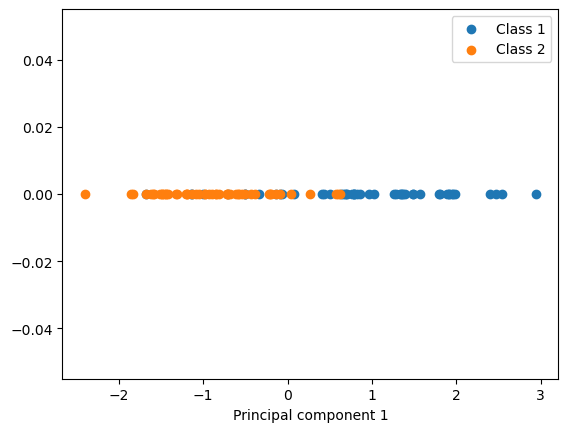

In [19]:
# Plot the principal components 
plt.scatter(data_pca[:50, 0], np.zeros(50), label='Class 1') 
plt.scatter(data_pca[50:, 0], np.zeros(50), label='Class 2') 
plt.xlabel('Principal component 1') 
plt.legend() 
plt.show() 

Simulated 20 dimension Classification Data

In [20]:
##Simulated 20 dimension Classification Data 
import numpy as np 
from sklearn.datasets import make_classification 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

In [21]:
# Generate simulated 20-dimensional data with 3 classes 
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_classes=3, random_state=42)

In [22]:
X, y 

(array([[-2.22873373,  2.89517557,  1.10771972, ...,  0.12232669,
         -1.33371286,  1.58333251],
        [-4.27796085,  2.29215603, -1.46926724, ..., -0.33716055,
          0.25609741,  0.68641291],
        [-2.56522386,  2.08217732,  2.38029348, ...,  0.837051  ,
          2.23459211,  2.85655049],
        ...,
        [-3.93513332,  0.98121386, -5.05589712, ...,  1.13664971,
         -1.62698476, -4.86601497],
        [-1.06653233,  1.57973744,  0.51639177, ..., -0.3484832 ,
         -0.76730055,  0.45668831],
        [ 2.20465569,  0.2558472 ,  0.20135989, ...,  0.48088265,
          0.25178108,  2.15977398]]),
 array([0, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2,
        0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1,
        1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0,
        0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0,
        0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1,
   

In [23]:
X.shape, y.shape

((1000, 20), (1000,))

In [24]:
# Split the data into training and testing and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [25]:
X_train, X_test, y_train, y_test 

(array([[ 1.28946498, -2.64368289,  2.42817314, ...,  0.41216385,
          3.88386578,  2.26223796],
        [ 1.82336323,  0.26709229,  0.20538596, ...,  0.07264421,
          2.56573054, -0.69985532],
        [-0.51879514,  3.57883619,  1.12913385, ...,  2.01872491,
          2.94223086,  5.36871301],
        ...,
        [-0.97732674, -1.03282644,  0.09326438, ...,  0.14933384,
         -2.37222471, -1.60428525],
        [ 0.31986914, -2.64847713,  0.66064823, ...,  0.68614192,
         -1.89306462,  1.60326378],
        [-1.80371149,  0.07547596,  3.34060815, ..., -2.28301037,
          1.66649104,  2.21791059]]),
 array([[-2.75608447,  4.03914883,  0.05718032, ...,  0.93376208,
          0.45231828,  1.2432436 ],
        [ 5.25094951, -5.56886851, -2.01823495, ..., -0.28524134,
         -0.49710923, -1.89847771],
        [-5.59056066,  3.91525405,  1.37741532, ...,  1.20700324,
         -1.86047442,  3.1703355 ],
        ...,
        [ 1.75581397, -1.27868172,  1.55532072, ...,  

In [26]:
X_test.shape, y_train.shape 

((200, 20), (800,))

Standardize the data

In [27]:
X_mean = np.mean(X_train, axis=0) 
X_std = np.std(X_train, axis=0) 
X_std[X_std == 0] = 1 # avoid division by zero 
X_train_scaled = (X_train - X_mean) / X_std 
X_test_scaled = (X_test - X_mean) / X_std

In [28]:
X_mean

array([ 0.69046925, -0.04998789,  0.70495228,  0.3002679 , -0.05233395,
       -1.46051318, -0.70042687, -0.74284901, -0.01259814, -0.33115217,
        0.33675875, -0.28953852,  1.22601505, -0.14042099,  0.0474114 ,
       -0.02370325,  0.08715231,  0.05417802,  0.4224552 ,  0.73280108])

In [29]:
X_std

array([3.49968496, 2.17419328, 2.02577225, 1.8584303 , 1.02778041,
       4.05869245, 2.08992939, 1.9918385 , 0.98214483, 2.06798185,
       2.63586329, 2.03223194, 4.51703635, 2.1374717 , 0.99153553,
       1.00410351, 2.02039202, 1.05046974, 1.93816291, 2.45939355])

In [30]:
X_std[X_std == 0]

array([], dtype=float64)

In [31]:
X_train_scaled

array([[ 0.17115704, -1.19294592,  0.85064886, ...,  0.34078643,
         1.78592345,  0.62187562],
       [ 0.32371313,  0.14583808, -0.24660537, ...,  0.01757899,
         1.10582828, -0.58252426],
       [-0.34553521,  1.66904392,  0.20939253, ...,  1.87016038,
         1.30008455,  1.88498174],
       ...,
       [-0.47655603, -0.45204746, -0.30195295, ...,  0.09058407,
        -1.44192209, -0.95026936],
       [-0.10589528, -1.19515098, -0.0218702 , ...,  0.60160125,
        -1.19469824,  0.35393388],
       [-0.71268722,  0.05770593,  1.30106229, ..., -2.22489834,
         0.64186341,  0.60385192]])

In [32]:
X_test_scaled 

array([[-0.98481828,  1.88076044, -0.31976544, ...,  0.83732451,
         0.01540793,  0.20754813],
       [ 1.30311166, -2.53835787, -1.34427117, ..., -0.32311198,
        -0.47445157, -1.06988928],
       [-1.79474152,  1.82377619,  0.33195392, ...,  1.09743782,
        -1.17788325,  0.99111199],
       ...,
       [ 0.30441161, -0.56512631,  0.41977495, ...,  1.27209895,
        -0.10820676, -0.41690244],
       [-1.77879244,  0.49378195,  0.49791204, ..., -0.88096191,
        -0.81223204,  1.38637747],
       [ 0.09126209, -0.60580246,  1.2732677 , ...,  0.01652608,
        -0.19529141, -1.44406034]])

In [33]:
 #Fit a PCA model to the training data 
pca = PCA() 
pca.fit(X_train_scaled)

PCA()

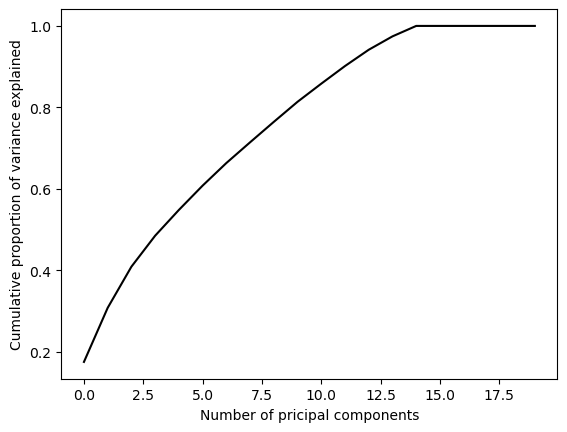

array([0.17533428, 0.30805747, 0.40910307, 0.48512348, 0.54835042,
       0.6080025 , 0.66346307, 0.71433541, 0.7645195 , 0.81376301,
       0.85826328, 0.90153494, 0.94150015, 0.97435595, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [34]:
# Calculate the proportion of variance explained by each principal component 
prop_var = pca.explained_variance_ratio_ 
# Calculate the cumulative proportion of variance explained 
cum_var = np.cumsum(prop_var) 
# Plot the cumulative proportion of variance explained 
import matplotlib.pyplot as plt 
plt.plot(cum_var, "-0") 
plt.xlabel( 'Number of pricipal components') 
plt.ylabel('Cumulative proportion of variance explained') 
plt.show() 
# Choose the number of pricipal components to retain based on the plot 
n_components = 10 
cum_var

In [35]:
prop_var

array([1.75334276e-01, 1.32723194e-01, 1.01045599e-01, 7.60204115e-02,
       6.32269385e-02, 5.96520757e-02, 5.54605717e-02, 5.08723380e-02,
       5.01840971e-02, 4.92435075e-02, 4.45002731e-02, 4.32716526e-02,
       3.99652097e-02, 3.28558022e-02, 2.56440527e-02, 4.62922516e-33,
       2.82123287e-33, 1.80311021e-33, 1.44165552e-33, 1.06267421e-33])

In [36]:
cum_var

array([0.17533428, 0.30805747, 0.40910307, 0.48512348, 0.54835042,
       0.6080025 , 0.66346307, 0.71433541, 0.7645195 , 0.81376301,
       0.85826328, 0.90153494, 0.94150015, 0.97435595, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [37]:
# Project the training and testing data onto the chosen principal components 
pca = PCA(n_components=n_components) 
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)

In [38]:
pca

PCA(n_components=10)

In [39]:
X_train_pca

array([[ 0.02251883, -0.47265373,  1.78861141, ...,  0.16536567,
         0.60350172, -1.08264487],
       [ 1.12340317, -1.89626416,  0.2644218 , ..., -0.14778738,
        -1.57379133, -0.64289899],
       [ 0.81339148,  1.02747138,  2.68662636, ..., -1.91469859,
        -1.43050292, -0.9030141 ],
       ...,
       [ 0.7861744 , -1.13327576, -1.12615855, ..., -0.73547413,
        -1.30472486,  0.86039895],
       [-0.7173385 ,  1.80000116, -0.66447632, ...,  0.21823825,
        -0.51814876, -0.48041096],
       [-0.78750088,  1.81389974, -0.17496222, ...,  0.54319503,
         1.49777014,  0.06877775]])

In [40]:
X_test_pca

array([[ 1.82506347,  0.55469798,  0.10409493, ..., -1.19837774,
        -0.50224719, -0.27317316],
       [-0.32065359, -0.96820086, -0.87899143, ...,  1.90590543,
         0.67998458, -0.80939314],
       [ 0.27060975,  3.40310763, -0.17348841, ..., -0.7256425 ,
        -0.54594529, -0.9202377 ],
       ...,
       [-0.70475864, -1.11504152,  0.00904926, ..., -1.10686014,
         2.19229481, -0.13553675],
       [ 0.46590507,  3.40512274,  0.64740404, ...,  0.66327134,
         0.72963115, -1.28372529],
       [-1.11190019, -2.27163287, -1.34492334, ...,  0.80891713,
        -0.88941294, -0.21316218]])

In [41]:
# Train a Logistic regression classifier on the projected training data 
clf = LogisticRegression(random_state=42) 
clf.fit(X_train_pca, y_train)

LogisticRegression(random_state=42)

In [42]:
# Predict the class Labels for the testing data 
y_pred = clf.predict(X_test_pca) 
# Evaluate the accuracy of the classifier 
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


IRIS DATA

In [43]:
##PCA from iris data
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.datasets import load_iris 
# Load the iris dataset 
iris = load_iris() 
X = iris.data 
y = iris.target 
X.shape, y.shape

((150, 4), (150,))

In [44]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

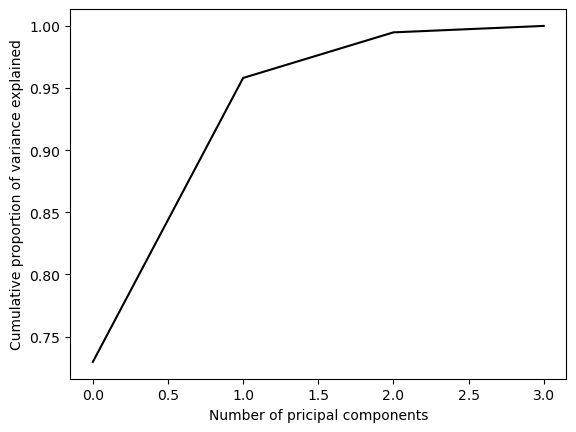

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [46]:
# Standardize the data 
X_mean = np.mean(X, axis=0) 
X_std = np.std(X, axis=0) 
X_std[X_std == 0] = 1 # avoid division by zero 
X_scaled = (X - X_mean) / X_std 
# Fit a PCA model to the standardize data 
pca = PCA() 
pca.fit(X_scaled) 
# Calculate the proportion of variance explained by each principal component 
prop_var = pca.explained_variance_ratio_ 
# Calculate the cumulative proportion of variance explained 
cum_var = np.cumsum(prop_var) 
# Plot the cumulative proportion of variance explained 
import matplotlib.pyplot as plt 
plt.plot(cum_var, '-0') 
plt.xlabel('Number of pricipal components') 
plt.ylabel('Cumulative proportion of variance explained') 
plt.show() 
# Choose the number of pricipal components to retain based on the plot 
n_components = 2 
cum_var

In [47]:
X_mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [48]:
X_std

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [49]:
X_std[X_std == 0]

array([], dtype=float64)

In [50]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [51]:
prop_var

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [52]:
cum_var

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

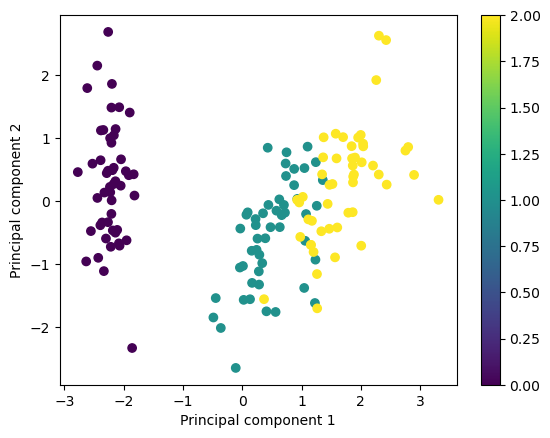

In [53]:
# Project the standardized data onto the chosen principal components 
pca = PCA(n_components=n_components) 
X_pca = pca.fit_transform(X_scaled) 
# Plot the principal components 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis') 
plt.xlabel('Principal component 1') 
plt.ylabel('Principal component 2') 
plt.colorbar() 
plt.show()

In [54]:
# Number of PC's by explained 
pcal = PCA(0.9) 
pcal.fit(X_scaled) 
pcal.n_components_

2

In [55]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.datasets import fetch_openml

In [56]:
# Load an example image dataset (MNIST digits) 
mnist = fetch_openml('mnist_784') 
X = mnist.data.to_numpy() # Convert to NumPy array 
X.shape

C:\Users\User\anaconda\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [57]:
X.shape

(70000, 784)

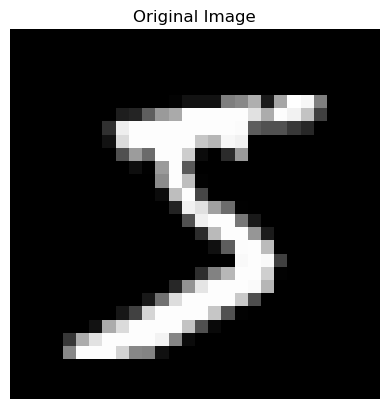

In [58]:
# Visualize the original image 
plt.imshow(X[0].reshape(28, 28), cmap='gray') 
plt.axis('off') 
plt.title('Original Image') 
plt.show()

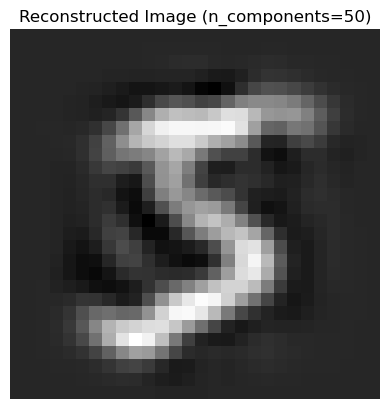

In [59]:
# Apply PCA to the image dataset 
n_components = 50 # number of principal components to retain 
pca = PCA(n_components=n_components) 
X_pca = pca.fit_transform(X) 
# Reconstruct the image from the principal components 
X_reconstructed = pca.inverse_transform(X_pca) 
# Visualize the reconstructed image 
plt.imshow(X_reconstructed[0].reshape(28, 28), cmap='gray') 
plt.axis('off') 
plt.title(f'Reconstructed Image (n_components={n_components})') 
plt.show()

In [60]:
# Calculate the compression ratio 
compression_ratio = np.prod(X_pca.shape) / np.prod(X.shape) 
print(f"Compression ratio: {compression_ratio:.2f}")

Compression ratio: 0.06


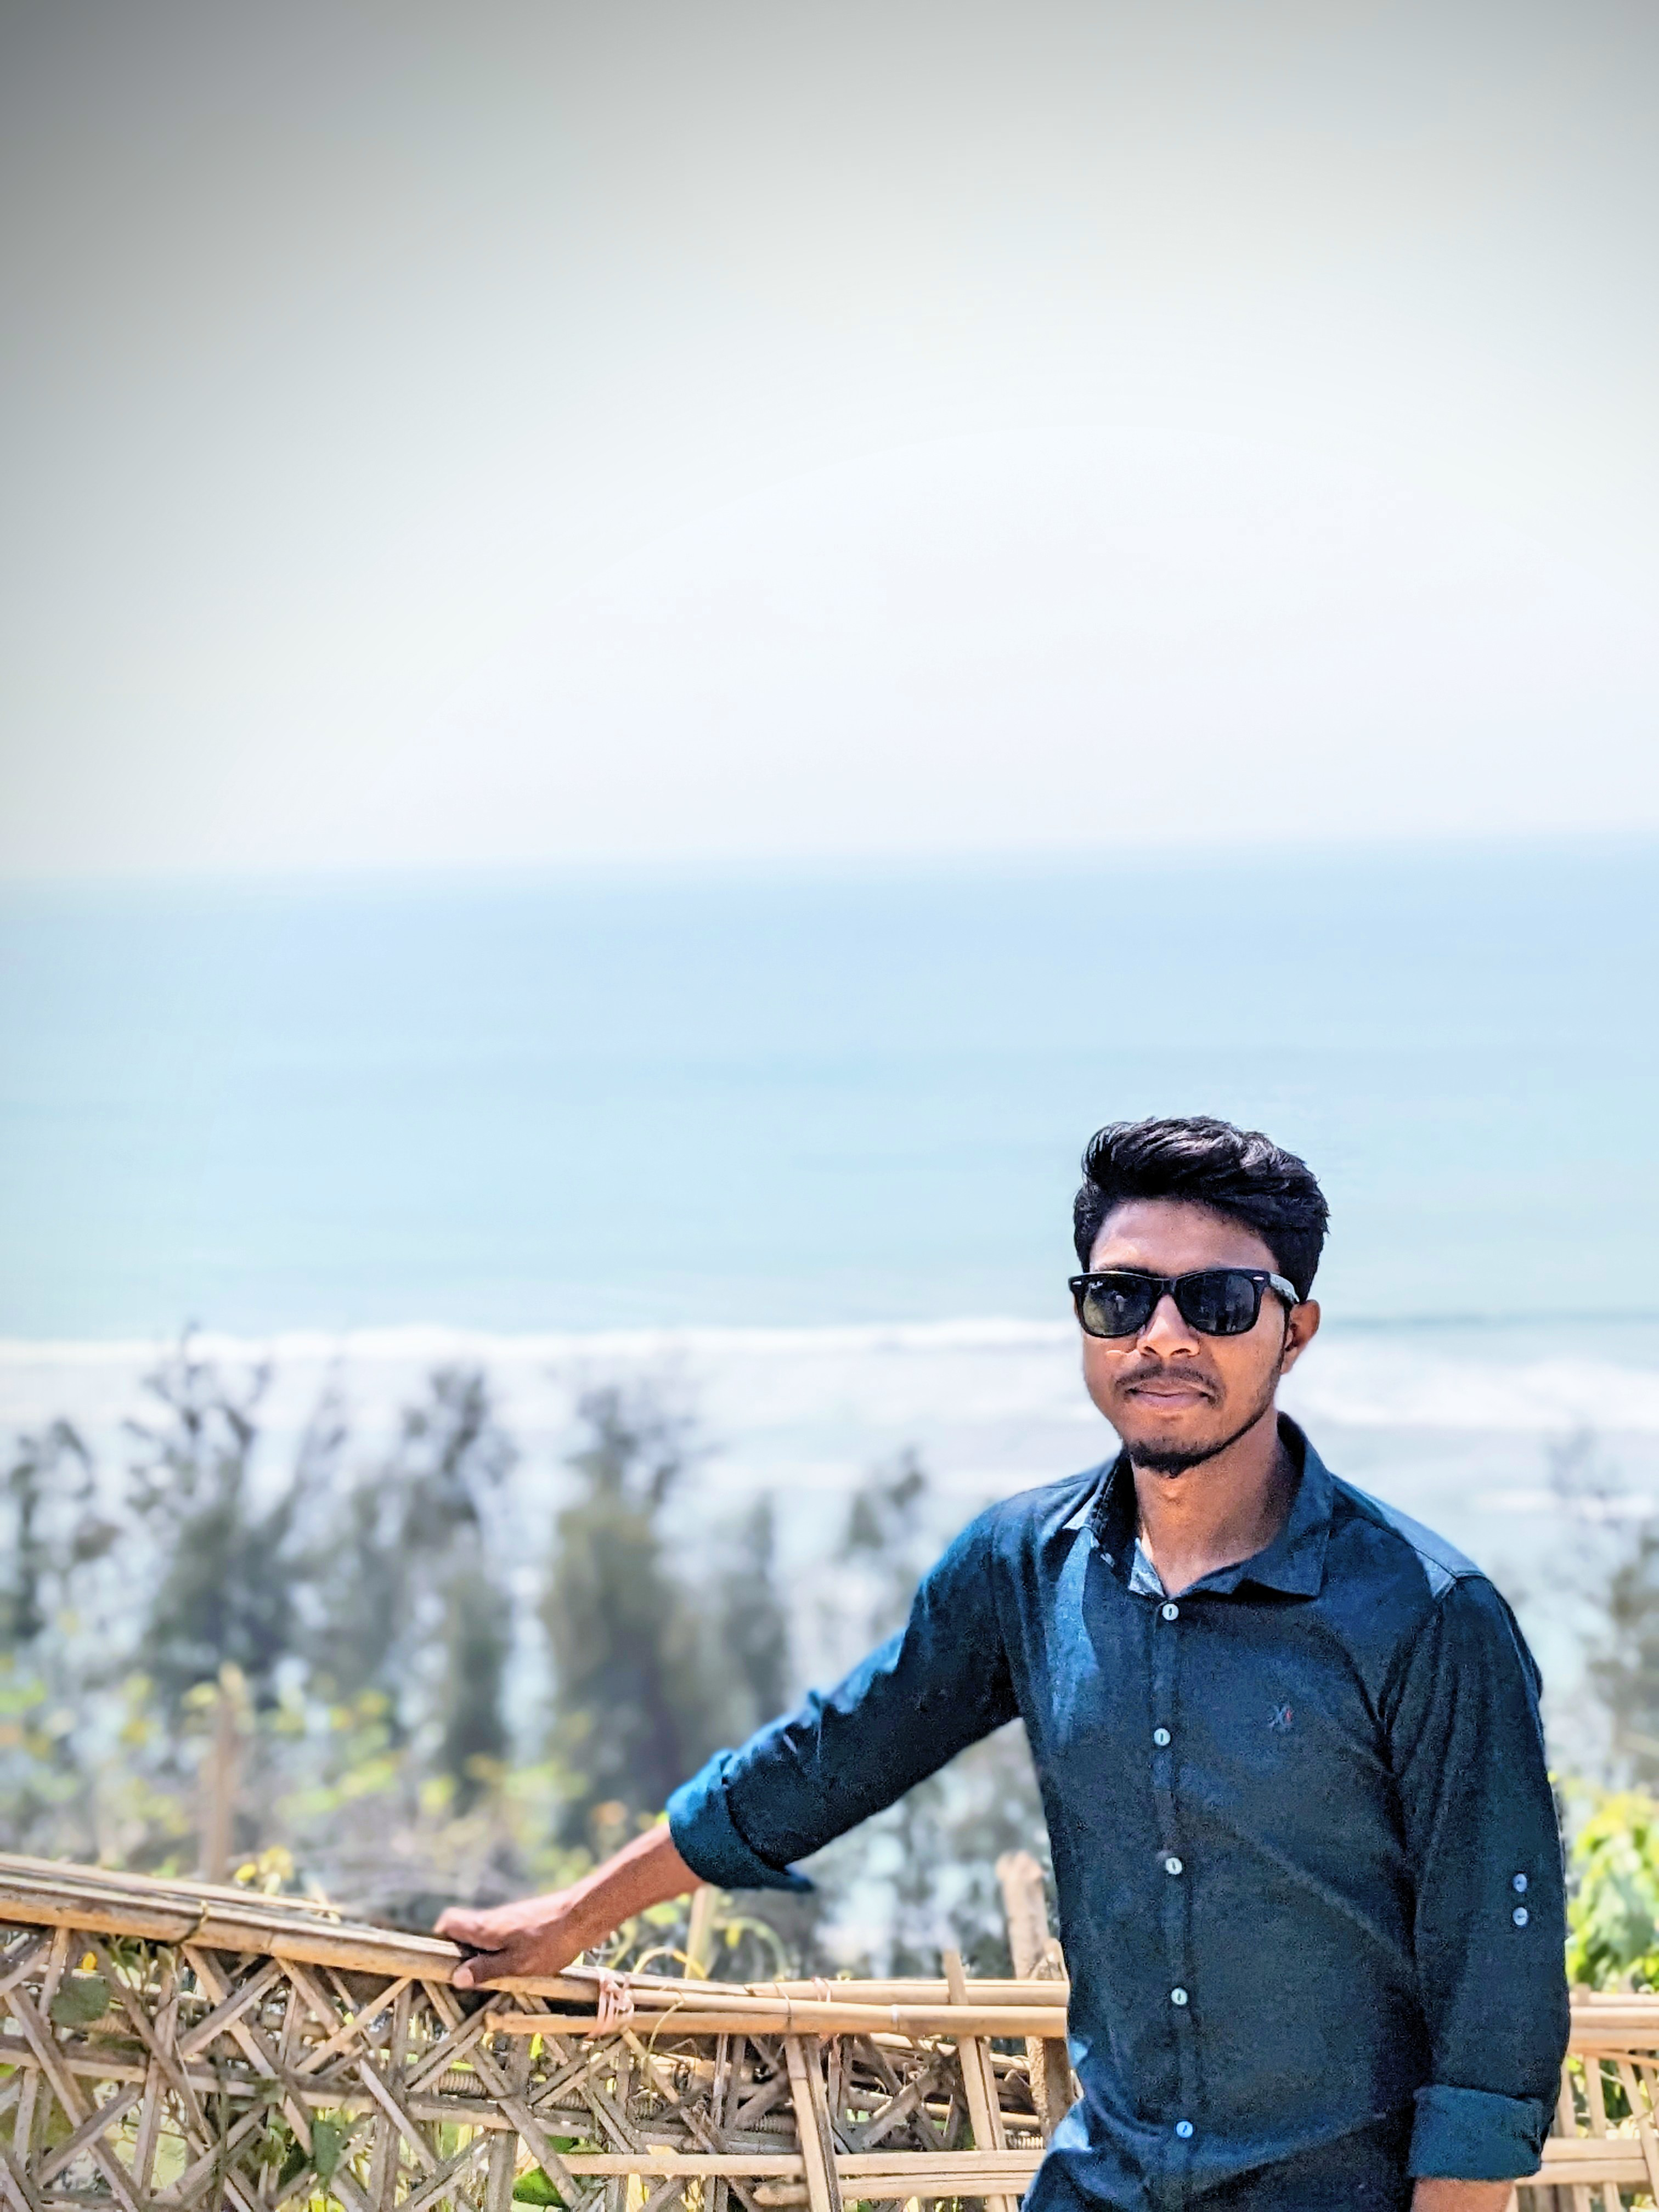

In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from PIL import Image 
from sklearn.decomposition import PCA 
image = Image.open(r"C:\Users\User\Downloads\PXL_20230310_065837741.PORTRAIT~2.jpg") 
display(image)

In [62]:
##convert the image to a numpy array
image_array = np.array(image)
image_array.shape

(4032, 3024, 3)

In [63]:
#flatten the image array
image_array_flat = image_array.reshape(-1,3)
image_array_flat.shape

(12192768, 3)

In [64]:
# Apply PCA to theflattened image array
n_components = 2  # number of principal components to retain
pca = PCA( n_components=n_components)
image_pca = pca.fit_transform(image_array_flat)

In [65]:
image_pca

array([[124.46462673,   7.30822607],
       [124.46462673,   7.30822607],
       [124.46462673,   7.30822607],
       ...,
       [-58.87340882,  37.24406512],
       [-50.81043062,  39.45814462],
       [-45.62975297,  40.18255108]])

In [66]:
 ##Reconstruct the image from the principal components 
image_reconstructed = pca.inverse_transform(image_pca) 
image_reconstructed = np.clip(image_reconstructed, 0, 255).astype('uint8') 
image_reconstructed = image_reconstructed.reshape(image_array.shape) 
image_reconstructed.shape 

(4032, 3024, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

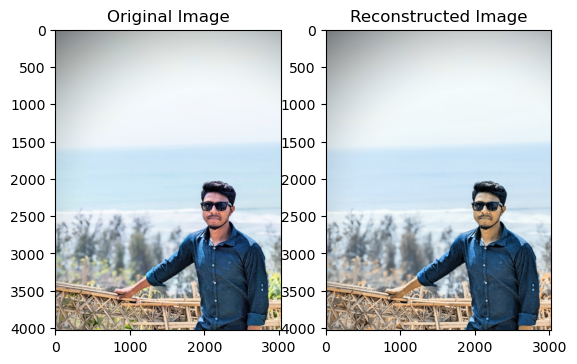

In [67]:
# Visualize the original and reconstructed images 
fig, ax = plt.subplots(1,2) 
ax[0].imshow(image) 
ax[0].set(title='Original Image') 
ax[1].imshow(image_reconstructed) 
ax[1].set(title='Reconstructed Image') 
plt.show